In [3]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris


import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import warnings
warnings.simplefilter('ignore')

In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris['feature_names']
# sepla:꽃잎,넓이
# petal:꽃받침 길이,넓이
# 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 0 : setosa
# 1: versicolor
# 2: virginica
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),speics
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
speics,0.782561,-0.426658,0.949035,0.956547,1.000000


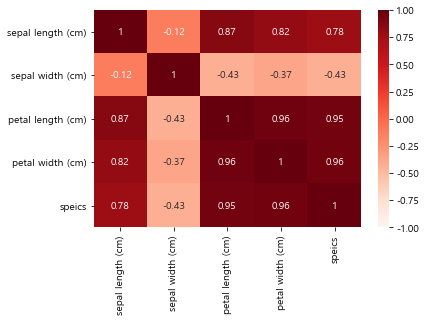

In [18]:
sns.heatmap( iris_df.corr(), annot=True, cmap='Reds', vmin = -1,vmax = 1)
plt.show() 

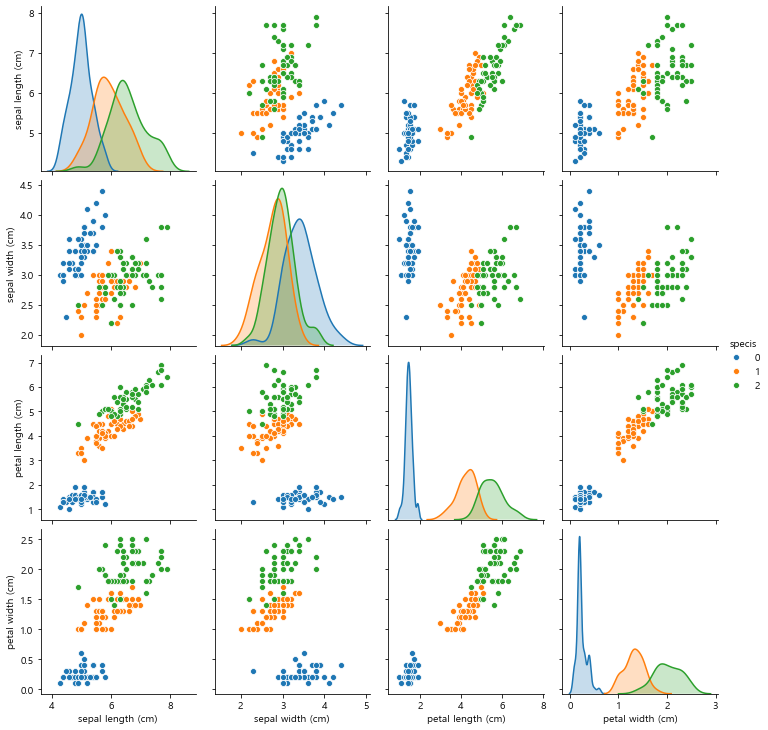

In [22]:
sns.pairplot(data = iris_df,hue = 'specis')
plt.show()

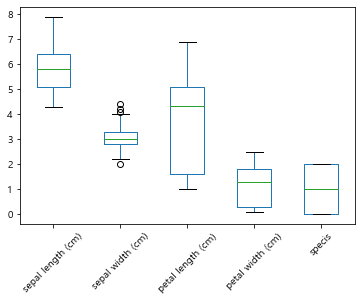

In [29]:
iris_df.plot(kind = 'box',rot = 45)
plt.show()

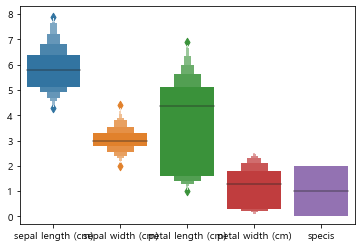

In [28]:
sns.boxenplot(data = iris_df)
plt.show()

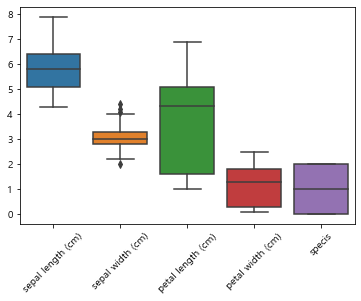

In [33]:
plt.xticks(rotation = 45)
sns.boxplot(data = iris_df)
plt.show()

In [35]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

In [39]:
# x_data
# y_data
x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size = 0.2,
                                                stratify = y_data)

In [40]:
model_logi = LogisticRegression( multi_class = 'multinomial' )
model_logi.fit( x_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
model_logi.score(x_test,y_test)

1.0

In [47]:
y_predict = model_logi.predict(x_test)
y_predict

array([0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 0, 0, 1, 2])

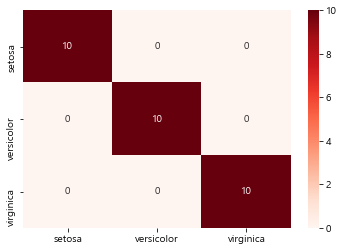

In [49]:
cm = metrics.confusion_matrix(y_test, y_predict)
# sns.heatmap( cm, annot=True, cmap='Reds')
sns.heatmap( cm, annot=True, cmap='Reds',
           xticklabels=iris['target_names'],
           yticklabels=iris['target_names']
           )
plt.show() 

In [51]:
metrics.f1_score(y_test,y_predict,average = 'macro')

1.0

In [88]:
# argmax() = 가장큰값이 있는 인덱스
# argmax(axis = 1) = 그행에서 가장큰값이 있는 인덱스
model_logi.predict_proba(x_test)

array([[9.69165728e-01, 3.08342086e-02, 6.28998720e-08],
       [9.72729963e-01, 2.72700029e-02, 3.42466383e-08],
       [3.30464746e-02, 9.45593667e-01, 2.13598584e-02],
       [1.75237108e-05, 4.44055761e-02, 9.55576900e-01],
       [1.88430698e-06, 6.25422782e-03, 9.93743888e-01],
       [6.04902849e-03, 9.16120088e-01, 7.78308836e-02],
       [9.57181717e-01, 4.28180282e-02, 2.54786248e-07],
       [2.25657583e-02, 9.18214057e-01, 5.92201842e-02],
       [7.78984907e-08, 7.47727503e-03, 9.92522647e-01],
       [9.11004794e-06, 7.19955310e-02, 9.27995359e-01],
       [2.12389318e-02, 9.20619015e-01, 5.81420531e-02],
       [3.57138463e-03, 8.43430268e-01, 1.52998347e-01],
       [1.89153569e-02, 9.45398963e-01, 3.56856798e-02],
       [9.76263988e-01, 2.37359625e-02, 4.98736531e-08],
       [9.82429632e-01, 1.75703383e-02, 2.97666662e-08],
       [2.22036850e-03, 7.51960886e-01, 2.45818746e-01],
       [9.83613888e-01, 1.63861016e-02, 1.00037336e-08],
       [9.75178365e-01, 2.48215

In [53]:
model_logi.coef_

array([[-0.40152115,  0.94128392, -2.37226938, -1.02058783],
       [ 0.51268783, -0.20168074, -0.13965861, -0.92122204],
       [-0.11116668, -0.73960317,  2.51192799,  1.94180987]])

In [54]:
model_logi.intercept_

array([  9.11405636,   1.58969688, -10.70375324])

In [ ]:
다중분류 w의갯수 : 피쳐의갯수*분류의갯수
ws1*x1 + ws2*x2 +ws2*x3 + ws3*x4 +bs
wvs1*x1 + wvs2*x2 +wvs2*x3 + wvs3*x4 +bvs
wvc1*x1 + wvc2*x2 +wvc2*x3 + wvc3*x4 +bvc

# 나중에 라벨값의 범주가 2개이상이면 라벨도 원핫인코딩

In [87]:
model_logi.predict_proba(x_test).argmax(axis=1)

array([0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 0, 0, 1, 2], dtype=int64)

In [66]:
aa=model_logi.coef_.T

In [79]:
# 행렬곱으로 predict_proba값을 구해보기
np.matmul( x_test.values, aa )+model_logi.intercept_

array([[  6.66607098,   3.2182601 ,  -9.88433108],
       [  6.91211596,   3.33779675, -10.24991271],
       [ -0.97249885,   2.38139921,  -1.40890036],
       [ -6.24802704,   1.58953842,   4.65848862],
       [ -7.09437585,   1.01307701,   6.08129884],
       [ -2.52496347,   2.49528631,   0.02967716],
       [  6.08203763,   2.97500361,  -9.05704124],
       [ -1.5569419 ,   2.149055  ,  -0.5921131 ],
       [ -9.27744207,   2.19453033,   7.08291174],
       [ -6.8354618 ,   2.13951956,   4.69594224],
       [ -1.59208789,   2.17712249,  -0.58503459],
       [ -3.0739992 ,   2.39052466,   0.68347454],
       [ -1.51546942,   2.39616348,  -0.88069406],
       [  6.83549748,   3.11875576,  -9.95425324],
       [  7.11198889,   3.08817232, -10.20016121],
       [ -3.51064414,   2.31436699,   1.19627714],
       [  7.49952851,   3.40472859, -10.9042571 ],
       [  6.55179194,   2.88088272,  -9.43267466],
       [ -1.15574951,   2.39853406,  -1.24278454],
       [ -7.8696799 ,   2.20939

In [77]:
model_logi.predict_proba([ [ 5.2,3.5,1.5,0.2 ] ]) # 1행 4열 
# model_logi.predict([ [ 5.2,3.5,1.5,0.2 ] ])

array([[9.67768765e-01, 3.22311518e-02, 8.29475271e-08]])